In [6]:
import Pkg
Pkg.add(["CairoMakie","GeometryBasics"])
using GeometryBasics,CairoMakie

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [5]:
function triangulate_poly(polygon)
    tris = []
    p0 = polygon[1]
    for i in 2:length(polygon)-1
        p1 = polygon[i]
        p2 = polygon[i+1]
        push!(tris, [p0, p1, p2])
    end
    return tris
end

function orientation(A, B, C)
    AB = [B[1] - A[1], B[2] - A[2]]
    AC = [C[1] - A[1], C[2] - A[2]]

    det = AB[1] * AC[2] - AB[2] * AC[1]
    return sign(det)
end

function intris(p, tris)
    A, B, C = tris
    turns = orientation(A, B, p) + orientation(B, C, p) + orientation(C, A, p)
    return abs(turns) == 3
end

function inpoly(p, poly)
    tris = triangulate_poly(poly)

    for tri in tris
        if intris(p, tri)
            return true
        end
    end
    return false
end

inpoly (generic function with 1 method)

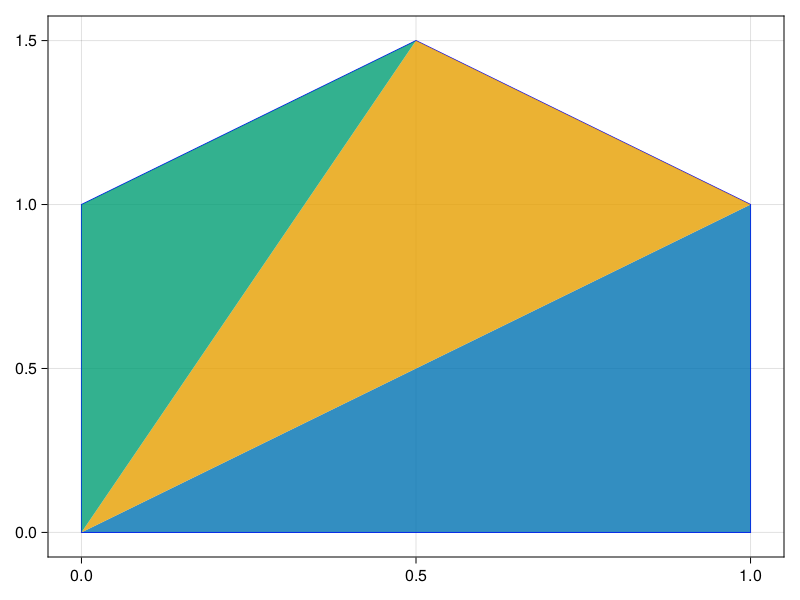

In [7]:
unit_square = [Point2(0.0,0.0), Point2(1.0,0.0), Point2(1.0,1.0), Point2(0.5, 1.5) ,Point2(0.0,1.0)]

fig,ax,poly_plot = poly(Polygon(unit_square), color=:transparent, strokewidth=1, strokecolor=:blue)

tris = triangulate_poly(unit_square)

poly!.(Ref(ax), Polygon.(tris))

fig